In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [42]:
df = pd.read_csv('data/income.zip')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
df.duplicated().sum()

24

In [53]:
df = df.drop_duplicates()

In [45]:
df.replace('?', np.nan, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [48]:
# Define imputer
imputer = IterativeImputer(random_state=42)

rf = RandomForestRegressor(random_state=42)
imputer = IterativeImputer(random_state=42, estimator=rf)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [49]:
df_to_impute = df.loc[:, ["workclass", "occupation", "native.country"]]
df_to_impute.head()

,workclass,occupation,native.country
0,NaN,NaN,United-States
1,Private,Exec-managerial,United-States
2,NaN,NaN,United-States
3,Private,Machine-op-inspct,United-States
4,Private,Prof-specialty,United-States


In [ ]:
# Encode categories for imputation
encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df_to_impute)

# Impute missing values numerically
imputer = IterativeImputer(estimator=RandomForestClassifier(), random_state=42)
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to original strings
df_imputed = pd.DataFrame(encoder.inverse_transform(df_imputed), columns=df_to_impute.columns)


c:\Users\Galyna\anaconda3\envs\ml2025\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [19]:
df_imputed.head()

,workclass,occupation,native.country
0,Private,Craft-repair,United-States
1,Private,Exec-managerial,United-States
2,Private,Craft-repair,United-States
3,Private,Machine-op-inspct,United-States
4,Private,Prof-specialty,United-States


In [51]:
df[["workclass", "occupation", "native.country"]] = df_imputed[["workclass", "occupation", "native.country"]]

In [52]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Craft-repair,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [56]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [58]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

# Income Analysis and Feature Relationships

We'll analyze several key aspects:
1. Feature correlations with income
2. Education and work-related factors
3. Demographic factors (race, sex, native country)
4. Financial factors (capital gains/losses)

In [65]:
df_corr = df.copy()
df_corr["income"] = df_corr["income"].map({"<=50K": 0, ">50K": 1}) 

In [66]:
numeric_df = df_corr.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

# Correlation with income only
print(corr_matrix["income"].sort_values(ascending=False))

income            1.000000
education.num     0.335272
age               0.234037
hours.per.week    0.229658
capital.gain      0.223336
capital.loss      0.150501
fnlwgt           -0.009502
Name: income, dtype: float64


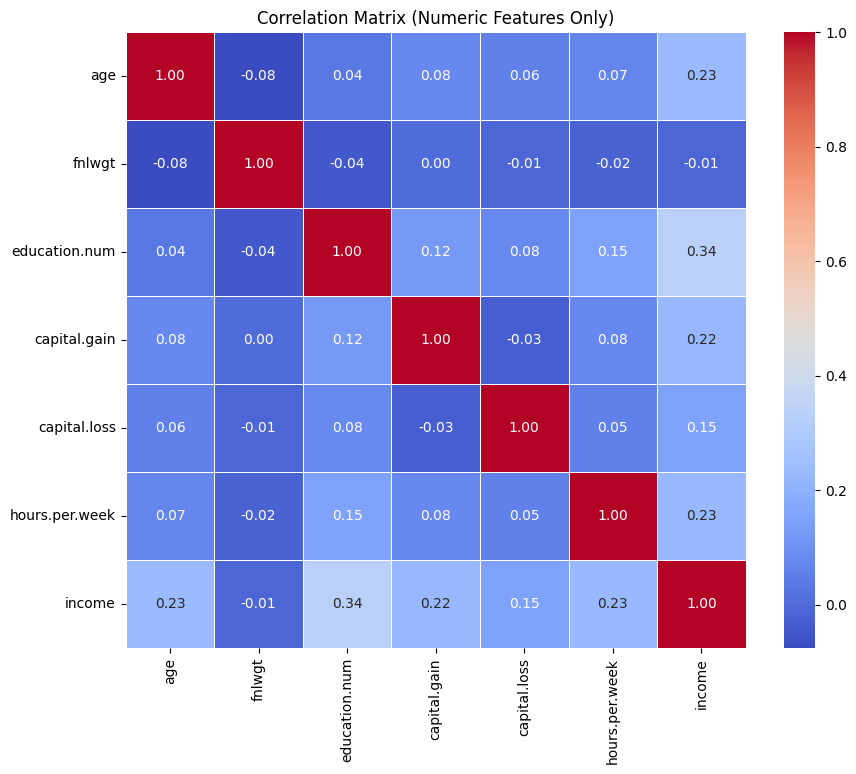

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [72]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # bias correction
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [73]:
# Select only categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()

# Create empty matrix
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

In [74]:
cramers_matrix = cramers_matrix.astype(float)

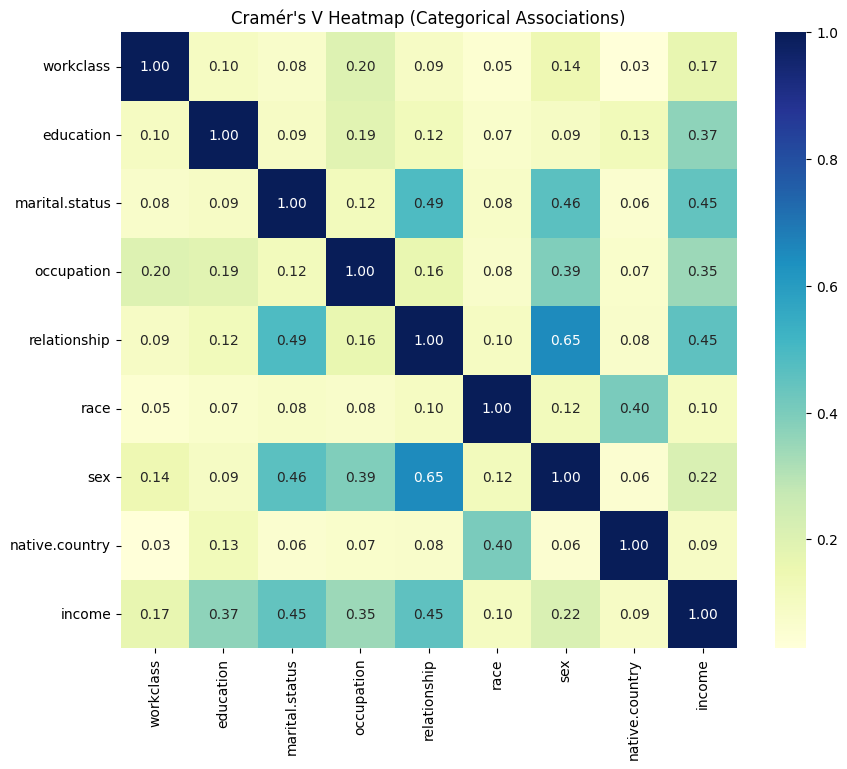

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Cramér's V Heatmap (Categorical Associations)")
plt.show()

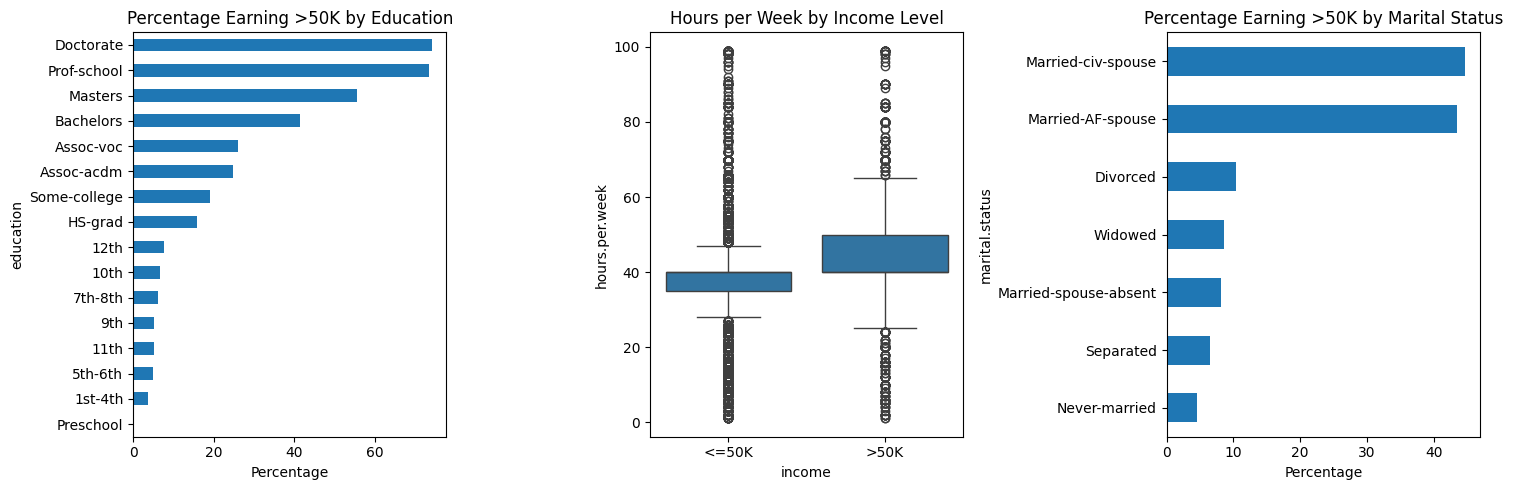


Mean hours worked by income level:
income
<=50K    38.842862
>50K     45.473402
Name: hours.per.week, dtype: float64


In [68]:
# Analyze education, hours-per-week, and marital status
plt.figure(figsize=(15, 5))

# Education vs Income
plt.subplot(1, 3, 1)
education_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100
education_income['>50K'].sort_values().plot(kind='barh')
plt.title('Percentage Earning >50K by Education')
plt.xlabel('Percentage')

# Hours per week vs Income
plt.subplot(1, 3, 2)
sns.boxplot(x='income', y='hours.per.week', data=df)
plt.title('Hours per Week by Income Level')

# Marital Status vs Income
plt.subplot(1, 3, 3)
marital_income = pd.crosstab(df['marital.status'], df['income'], normalize='index') * 100
marital_income['>50K'].sort_values().plot(kind='barh')
plt.title('Percentage Earning >50K by Marital Status')
plt.xlabel('Percentage')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nMean hours worked by income level:")
print(df.groupby('income')['hours.per.week'].mean())

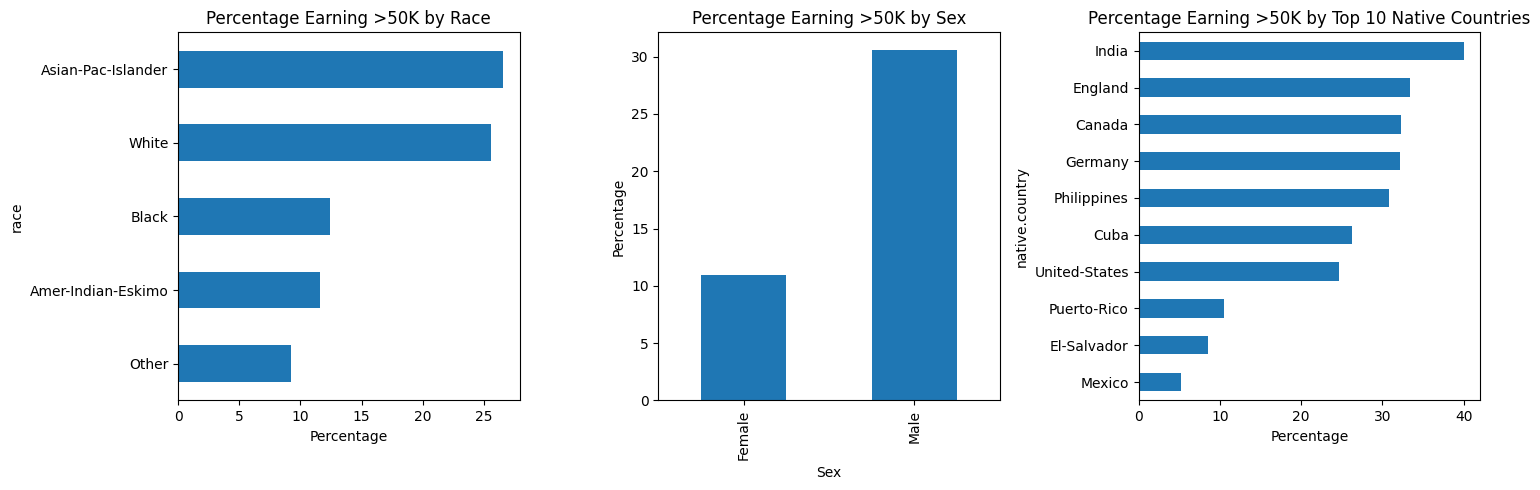

In [69]:
# Analyze demographic factors
plt.figure(figsize=(15, 5))

# Race vs Income
plt.subplot(1, 3, 1)
race_income = pd.crosstab(df['race'], df['income'], normalize='index') * 100
race_income['>50K'].sort_values().plot(kind='barh')
plt.title('Percentage Earning >50K by Race')
plt.xlabel('Percentage')

# Sex vs Income
plt.subplot(1, 3, 2)
sex_income = pd.crosstab(df['sex'], df['income'], normalize='index') * 100
sex_income['>50K'].plot(kind='bar')
plt.title('Percentage Earning >50K by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')

# Top 10 Native Countries vs Income
plt.subplot(1, 3, 3)
top_countries = df['native.country'].value_counts().head(10).index
country_income = pd.crosstab(
    df[df['native.country'].isin(top_countries)]['native.country'], 
    df[df['native.country'].isin(top_countries)]['income'], 
    normalize='index'
) * 100
country_income['>50K'].sort_values().plot(kind='barh')
plt.title('Percentage Earning >50K by Top 10 Native Countries')
plt.xlabel('Percentage')

plt.tight_layout()
plt.show()

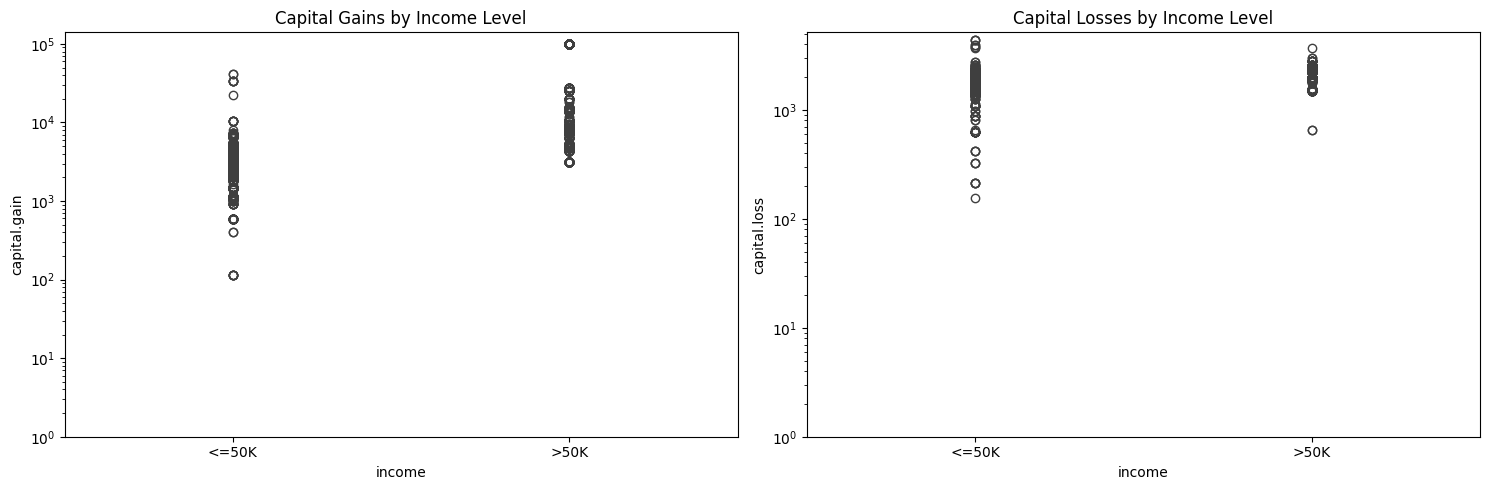


Capital Gains/Losses Summary by Income Level:

Mean Capital Gains:
income
<=50K     148.884970
>50K     4007.164562
Name: capital.gain, dtype: float64

Mean Capital Losses:
income
<=50K     53.190258
>50K     195.051282
Name: capital.loss, dtype: float64

Percentage with Capital Gains:
income
<=50K     4.190623
>50K     21.393035
Name: capital.gain, dtype: float64

Percentage with Capital Losses:
income
<=50K    3.020487
>50K     9.860952
Name: capital.loss, dtype: float64


In [70]:
# Analyze capital gains and losses
plt.figure(figsize=(15, 5))

# Capital Gains Analysis
plt.subplot(1, 2, 1)
sns.boxplot(x='income', y='capital.gain', data=df)
plt.title('Capital Gains by Income Level')
plt.yscale('log')  # Using log scale due to large variations
plt.ylim(bottom=1)  # Minimum value of 1 for log scale

# Capital Losses Analysis
plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='capital.loss', data=df)
plt.title('Capital Losses by Income Level')
plt.yscale('log')  # Using log scale due to large variations
plt.ylim(bottom=1)  # Minimum value of 1 for log scale

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nCapital Gains/Losses Summary by Income Level:")
print("\nMean Capital Gains:")
print(df.groupby('income')['capital.gain'].mean())
print("\nMean Capital Losses:")
print(df.groupby('income')['capital.loss'].mean())

# Calculate percentage of people with capital gains/losses by income level
print("\nPercentage with Capital Gains:")
print(df.groupby('income')['capital.gain'].apply(lambda x: (x > 0).mean() * 100))
print("\nPercentage with Capital Losses:")
print(df.groupby('income')['capital.loss'].apply(lambda x: (x > 0).mean() * 100))

# Target Variable Distribution Analysis
Let's examine the distribution of income levels (<=50K vs >50K) in different ways:

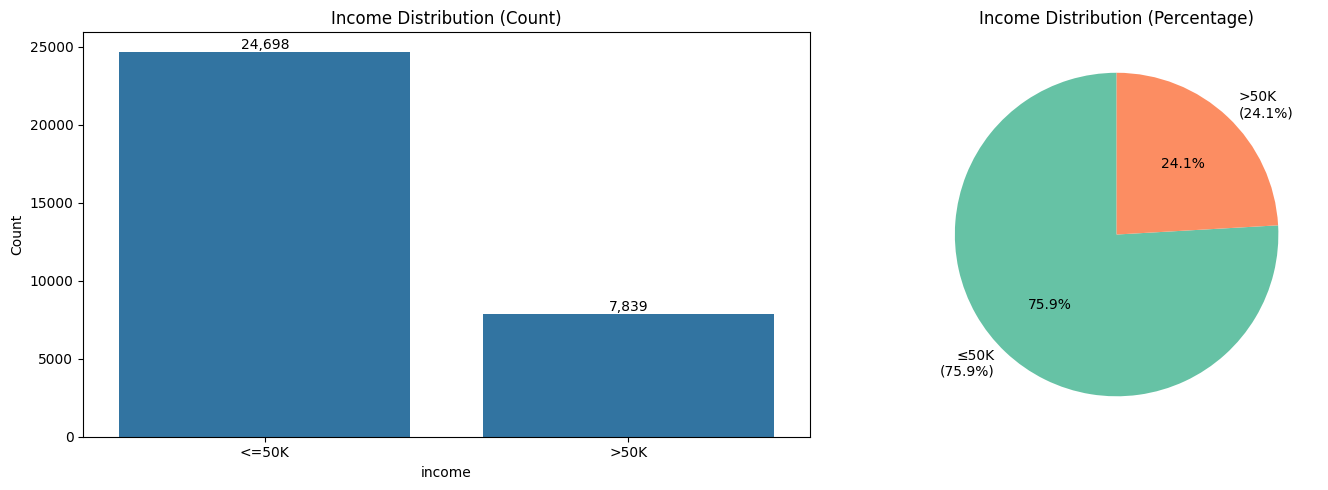


Detailed Income Distribution:

Counts:
income
<=50K    24698
>50K      7839
Name: count, dtype: int64

Percentages:
income
<=50K    75.907428
>50K     24.092572
Name: proportion, dtype: float64


In [77]:
# Calculate distribution of income levels
income_dist = df['income'].value_counts()
income_dist_pct = df['income'].value_counts(normalize=True) * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count Distribution
sns.countplot(data=df, x='income', ax=ax1)
ax1.set_title('Income Distribution (Count)')
ax1.set_ylabel('Count')
# Add count labels on top of bars
for i, count in enumerate(income_dist):
    ax1.text(i, count, f'{count:,}', ha='center', va='bottom')

# Plot 2: Percentage Distribution
colors = sns.color_palette("Set2")
ax2.pie(
    income_dist_pct,
    labels=[
        f'≤50K\n({income_dist_pct.iloc[0]:.1f}%)',
        f'>50K\n({income_dist_pct.iloc[1]:.1f}%)'
    ],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
ax2.set_title('Income Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Income Distribution:")
print("\nCounts:")
print(income_dist)
print("\nPercentages:")
print(income_dist_pct)

# Numeric Features Distribution Analysis
Creating a function to analyze the distribution of numeric features with respect to income levels:

In [83]:
def plot_numeric_feature_distribution(data, feature, bins=30):
    """
    Plot distribution of a numeric feature with respect to income levels.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The input DataFrame
    feature : str
        Name of the numeric feature to analyze
    bins : int
        Number of bins for histogram (default: 30)
    """
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Distribution by income level (histogram)
    plt.subplot(1, 3, 1)
    for income in data['income'].unique():
        sns.histplot(data=data[data['income'] == income][feature], 
                    label=income, bins=bins, alpha=0.5)
    plt.title(f'{feature} Distribution by Income Level')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    
    # Subplot 2: Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x='income', y=feature, data=data)
    plt.title(f'{feature} Box Plot by Income Level')
    
    # Subplot 3: Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x='income', y=feature, data=data)
    plt.title(f'{feature} Violin Plot by Income Level')
    
    plt.tight_layout()
    plt.show()    


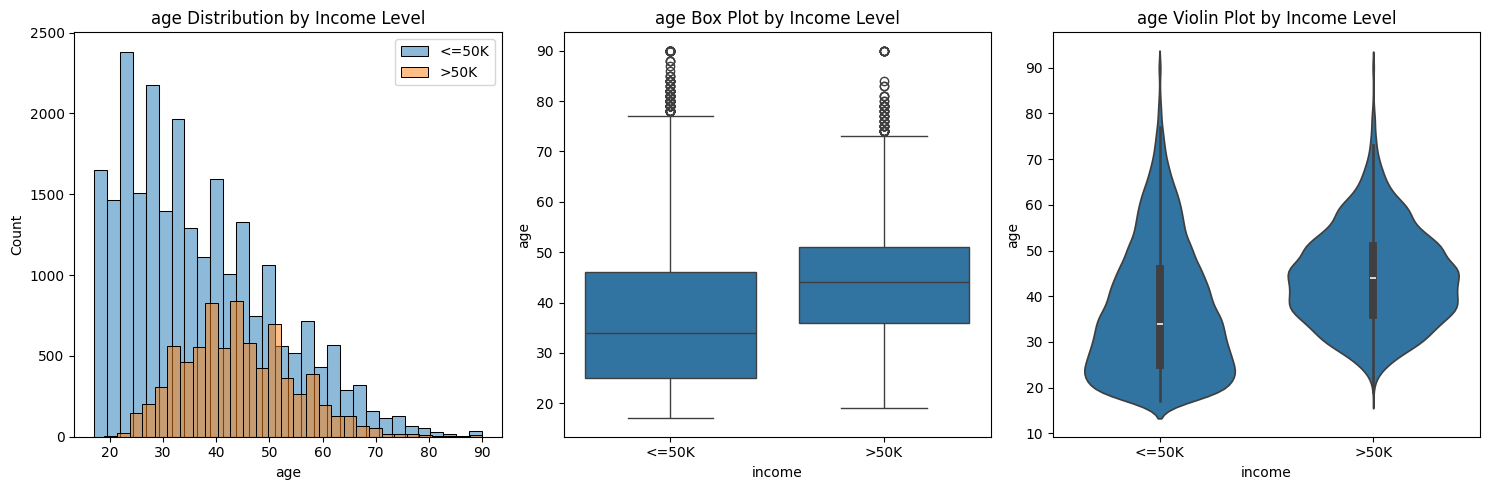

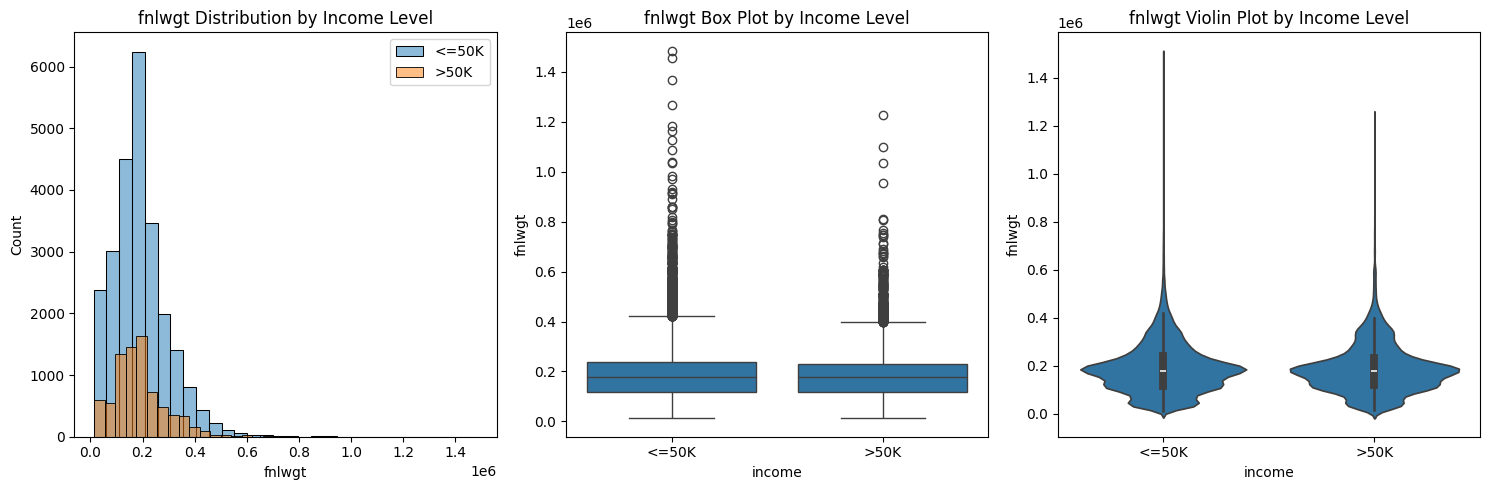

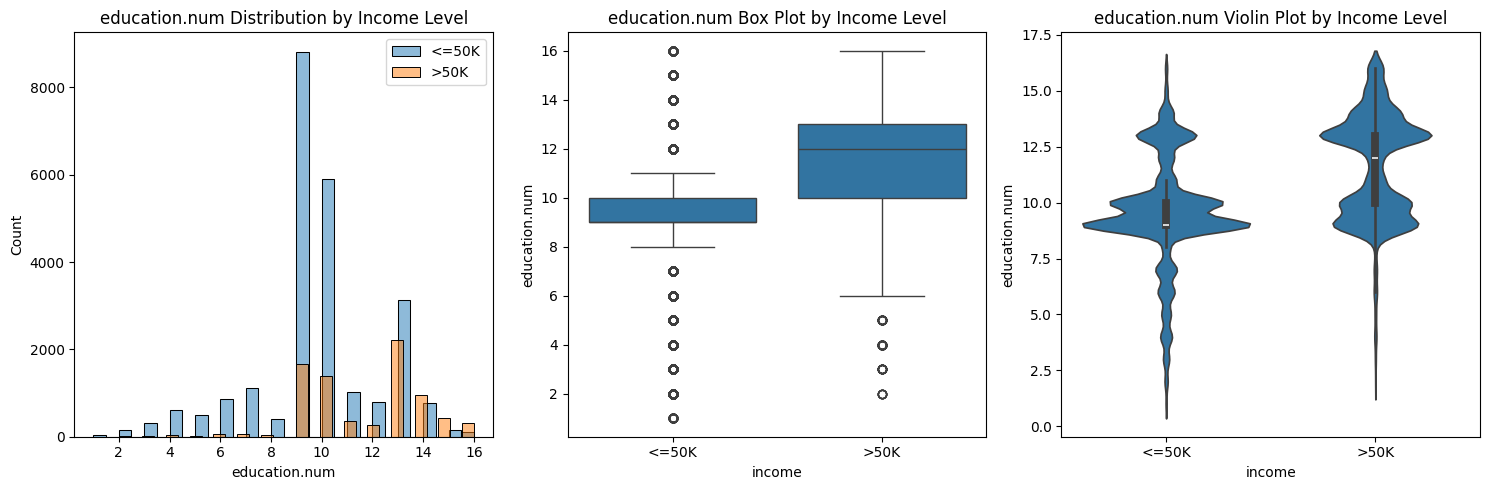

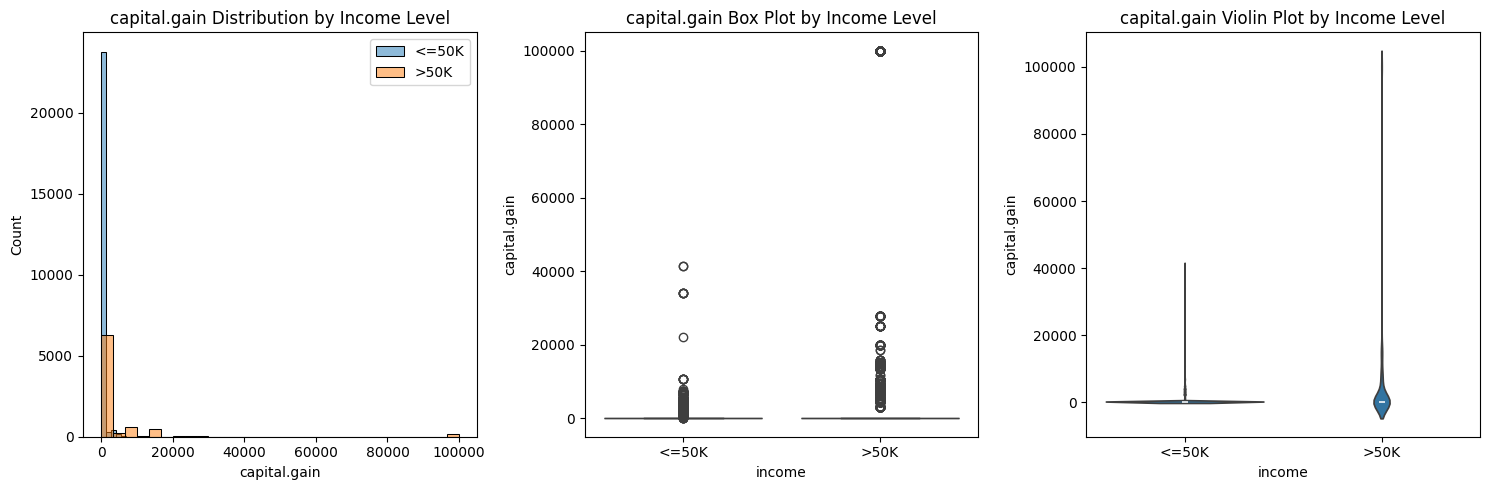

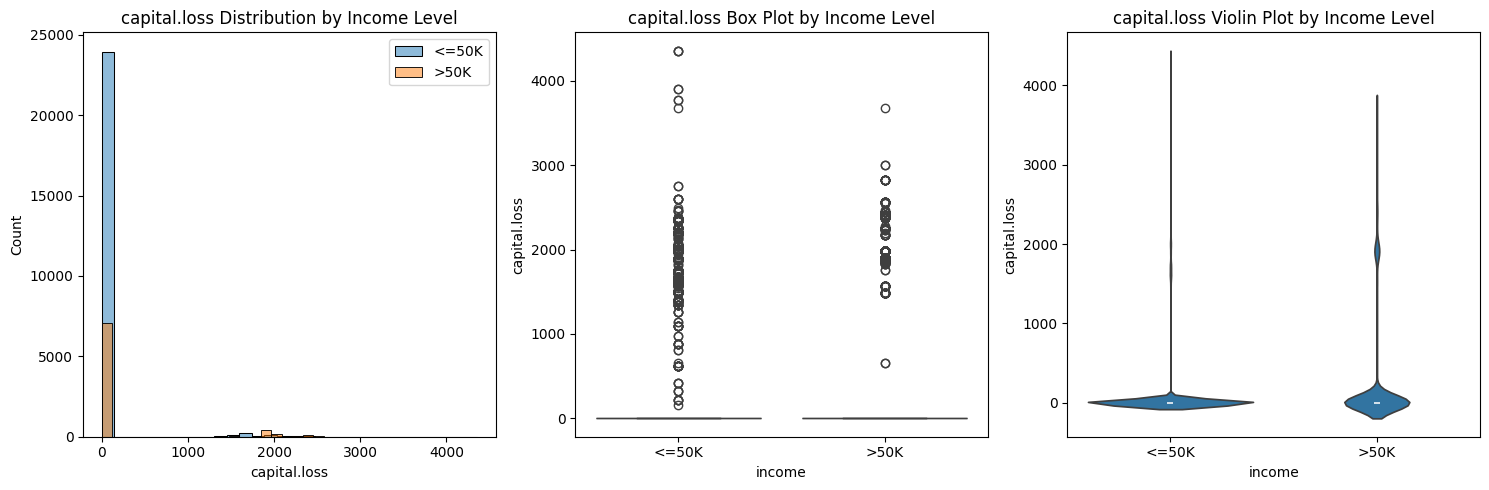

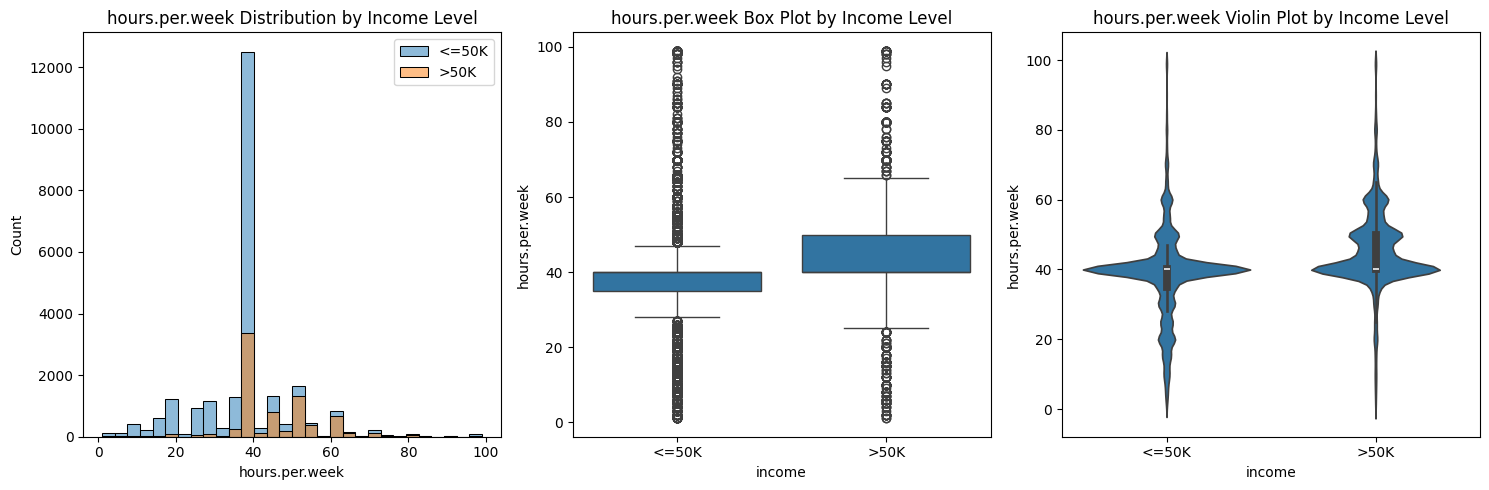

In [84]:
# Get numeric columns (excluding 'income_binary' if it exists)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
if 'income_binary' in numeric_cols:
    numeric_cols = numeric_cols.drop('income_binary')

# Plot distribution for each numeric feature
for feature in numeric_cols:
    #print(f"\n{'='*50}")
    #print(f"Analyzing {feature}")
    #print('='*50)
    plot_numeric_feature_distribution(df, feature)

### VIF analysis

In [103]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('income', errors='ignore')

In [104]:
X = df[numeric_cols].copy()

X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          feature        VIF
0           const  35.616453
1             age   1.019252
2          fnlwgt   1.007760
3   education.num   1.043770
4    capital.gain   1.026716
5    capital.loss   1.013460
6  hours.per.week   1.031974


In [98]:
categorical_cols = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country'
]

In [ ]:
# One-hot encode categorical features (drop first to avoid multicollinearity)
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine encoded categoricals + numeric
X = pd.concat([df[numeric_cols], df_encoded], axis=1)

# Convert everything to float to avoid dtype issues
X = X.astype(float)

In [100]:
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

c:\Users\Galyna\anaconda3\envs\ml2025\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Galyna\anaconda3\envs\ml2025\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [101]:
print(X.dtypes.unique())

[dtype('float64')]


In [102]:
display(vif_df)

,feature,VIF
0,const,0.000000
1,age,1.728342
2,fnlwgt,1.061031
3,education.num,inf
4,capital.gain,1.060857
...,...,...
93,native.country_Thailand,1.952406
94,native.country_Trinadad&Tobago,2.037996
95,native.country_United-States,140.381076
96,native.country_Vietnam,4.526653


### Sparsity analysis

C:\Users\Galyna\AppData\Local\Temp\ipykernel_25760\492971241.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sparsity_data = pd.concat([sparsity_data, pd.DataFrame({


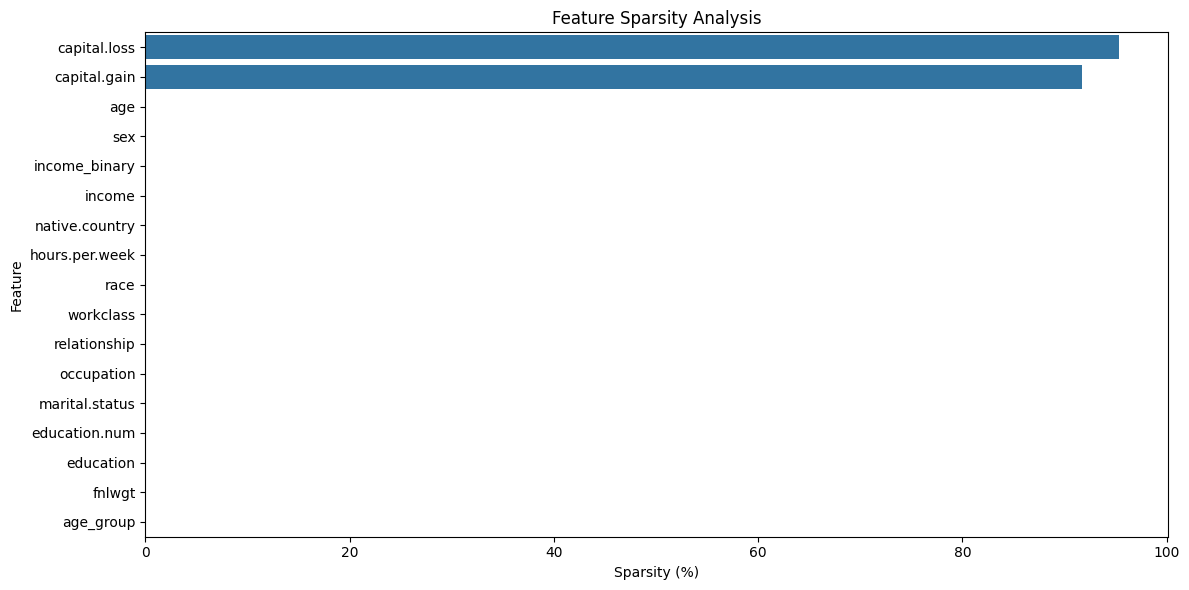

In [89]:
# Analyze feature sparsity
def analyze_sparsity(df):
    sparsity_data = pd.DataFrame(columns=['Feature', 'Sparsity (%)', 'Unique Values', 'Most Common Value (%)', 'Type'])
    
    for column in df.columns:
        # Calculate sparsity (percentage of missing or zero values)
        if df[column].dtype in ['int64', 'float64']:
            sparsity = (df[column].isna() | (df[column] == 0)).mean() * 100
        else:
            sparsity = df[column].isna().mean() * 100
        
        # Calculate most common value percentage
        most_common_pct = (df[column].value_counts().iloc[0] / len(df)) * 100
        
        # Add to dataframe
        sparsity_data = pd.concat([sparsity_data, pd.DataFrame({
            'Feature': [column],
            'Sparsity (%)': [sparsity],
            'Unique Values': [df[column].nunique()],
            'Most Common Value (%)': [most_common_pct],
            'Type': [df[column].dtype]
        })])
    
    return sparsity_data.sort_values('Sparsity (%)', ascending=False).reset_index(drop=True)

# Calculate and display sparsity
sparsity_data = analyze_sparsity(df)

# Plot sparsity
plt.figure(figsize=(12, 6))
sns.barplot(x='Sparsity (%)', y='Feature', data=sparsity_data)
plt.title('Feature Sparsity Analysis')
plt.tight_layout()
plt.show()

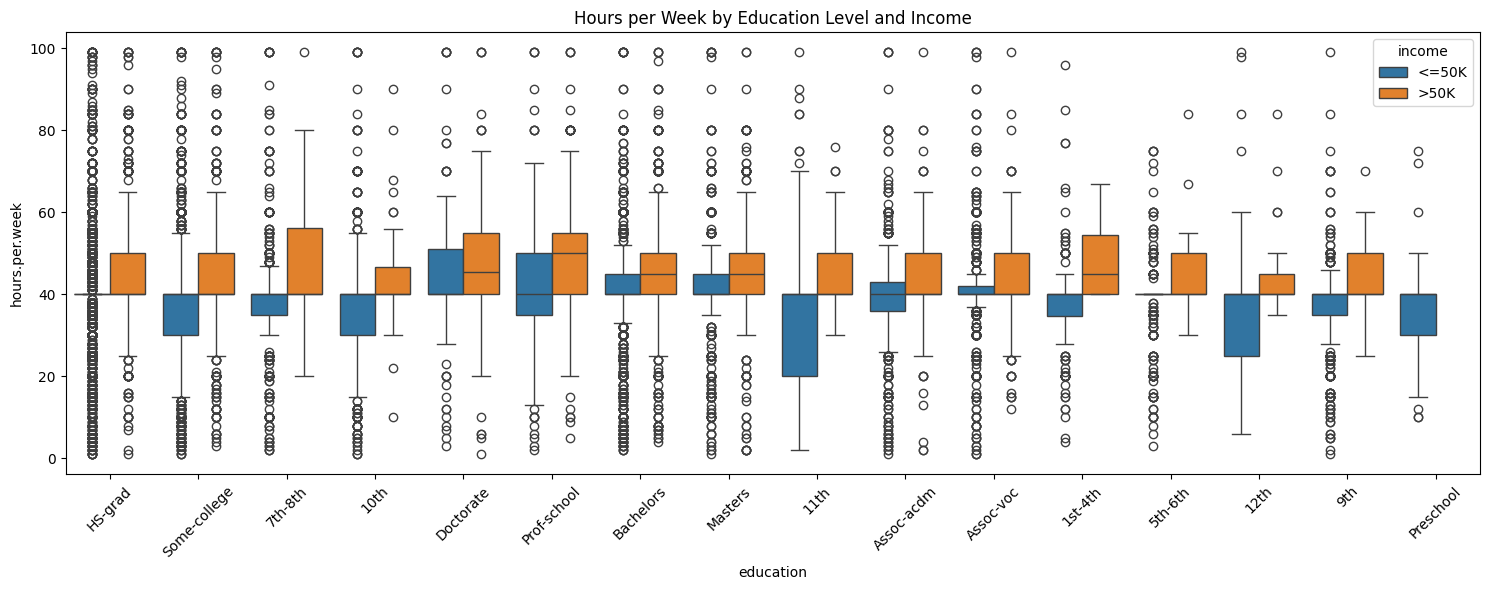

In [105]:
# Education × Hours per Week
plt.figure(figsize=(15, 6))
sns.boxplot(x='education', y='hours.per.week', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Hours per Week by Education Level and Income')
plt.tight_layout()
plt.show()

In [106]:
# Calculate mean hours and income percentage for each education level
education_analysis = df.groupby('education').agg({
    'hours.per.week': 'mean',
    'income': lambda x: (x == '>50K').mean() * 100
}).round(2)
education_analysis.columns = ['Mean Hours/Week', '% Earning >50K']

In [107]:
education_analysis

,Mean Hours/Week,% Earning >50K
education,,
10th,37.05,6.65
11th,33.93,5.11
12th,35.78,7.62
1st-4th,38.23,3.61
5th-6th,38.85,4.82
7th-8th,39.37,6.20
9th,38.04,5.25
Assoc-acdm,40.50,24.84
Assoc-voc,41.61,26.12


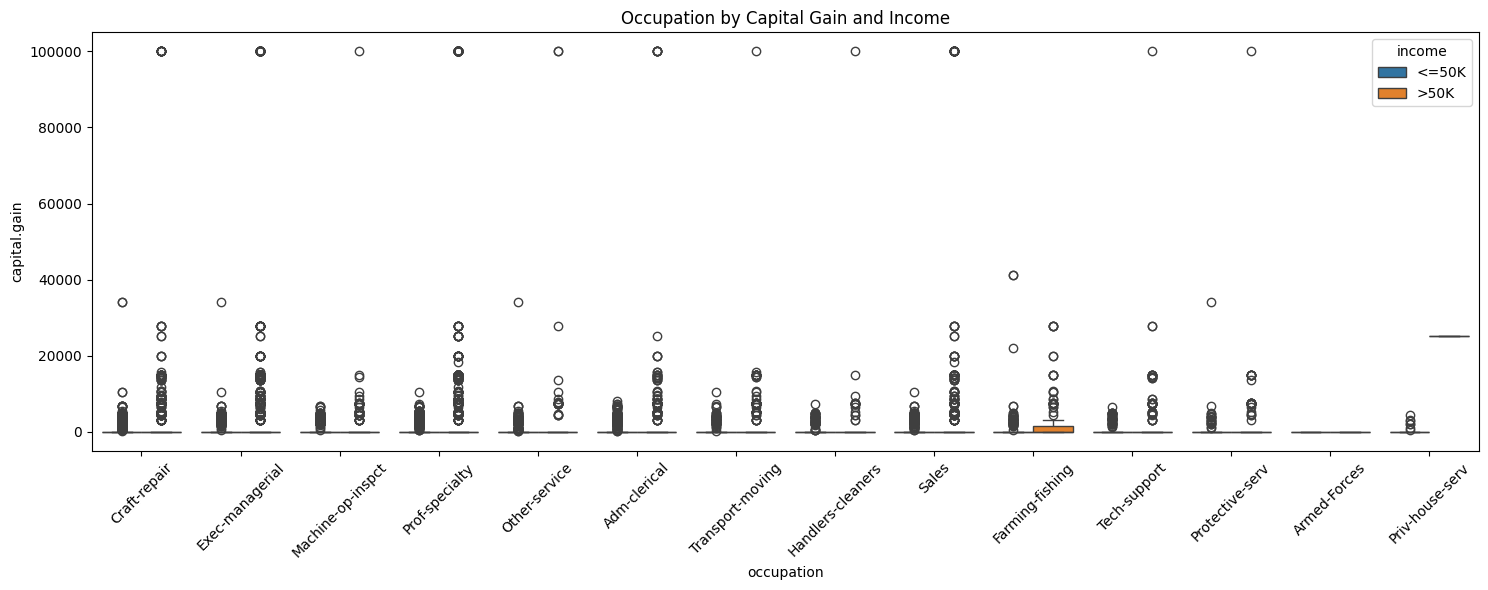

In [108]:
# Education × Hours per Week
plt.figure(figsize=(15, 6))
sns.boxplot(x='occupation', y='capital.gain', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Occupation by Capital Gain and Income')
plt.tight_layout()
plt.show()